# Import Library

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import kagglehub
import os, datetime
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from PIL import Image
import matplotlib.pyplot as plt
import pydotplus
import pydot
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np
import cv2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

# Data Downloading

In [ ]:
path = kagglehub.dataset_download("xhlulu/140k-real-and-fake-faces")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/140k-real-and-fake-faces


# Data Loading

In [ ]:
base_dir = "/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/"
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
valid_dir = os.path.join(base_dir, 'valid')
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, batch_size=64, class_mode='binary', target_size=(150, 150), shuffle=True)

validation_generator = valid_datagen.flow_from_directory(
    valid_dir, batch_size=64, class_mode='binary', target_size=(150, 150), shuffle=True)

test_generator = test_datagen.flow_from_directory(
    test_dir, batch_size=64, class_mode='binary', target_size=(150, 150), shuffle=False)

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


# Proposed CNN Model

In [ ]:
model_cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model Training

In [ ]:
history_cnn = model_cnn.fit(train_generator, validation_data=validation_generator, epochs=15)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 826s 523ms/step - accuracy: 0.6634 - loss: 1.0006 - val_accuracy: 0.8404 - val_loss: 0.3687
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 205s 131ms/step - accuracy: 0.8472 - loss: 0.3408 - val_accuracy: 0.9123 - val_loss: 0.2121
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 209s 134ms/step - accuracy: 0.9175 - loss: 0.1929 - val_accuracy: 0.8830 - val_loss: 0.3483
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 202s 129ms/step - accuracy: 0.9440 - loss: 0.1365 - val_accuracy: 0.9227 - val_loss: 0.2056
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 204s 130ms/step - accuracy: 0.9576 - loss: 0.1051 - val_accuracy: 0.9514 - val_loss: 0.1231
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 207s 132ms/step - accuracy: 0.9651 - loss: 0.0847 - val_accuracy: 0.9324 - val_loss: 0.3191
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 218s 140ms/step - accuracy: 0.9725 - loss: 0.0754 - val_accuracy: 0.9440 - val_loss: 0.1559
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 209s 133ms/step - ac

# Plot Result

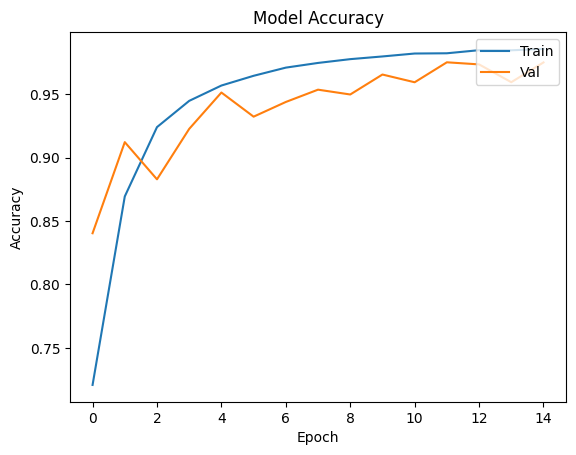

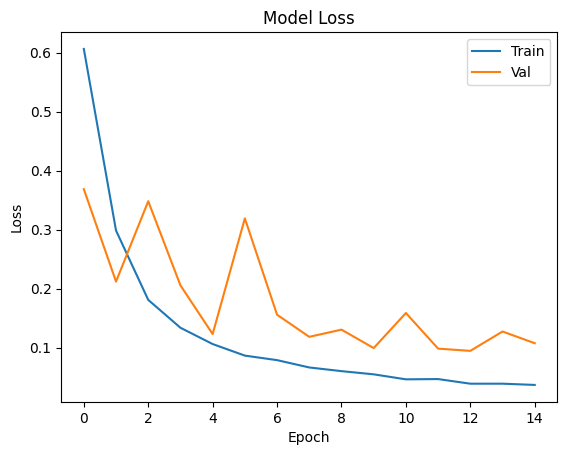

In [ ]:
history = history_cnn
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

# Evaluation Metrics Results

In [ ]:
test_generator.reset()
predictions_cnn = model_cnn.predict(test_generator)
predicted_classes_cnn = (predictions_cnn > 0.5).astype(int).reshape(-1)
true_classes = test_generator.classes
print("Accuracy:", accuracy_score(true_classes, predicted_classes_cnn))
print("Precision:", precision_score(true_classes, predicted_classes_cnn))
print("Recall:", recall_score(true_classes, predicted_classes_cnn))
print("F1 Score:", f1_score(true_classes, predicted_classes_cnn))